## Python Analysis

After analyzing the cleaned text using Python, we also explored the following research questions.

First, there is the import of the necessary Python runtime libraries.

In [1]:
# natural language processing and text analysis with nltk
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

# using os to process cleaned txt files
import os

# using string for faster processing of strings.
import string

# using plt and pandas to work with charts and tables
import matplotlib.pyplot as plt
import pandas as pd

# counter required to calculate word frequency
from collections import Counter

Extract the tokens and lemmas we extracted from the corpus, and import as dataframe. So that we can process them later directly through the DataFrame.

In [106]:
# Import our corpus data
df_corpus = pd.read_csv('C:/Users/70794/manually/enriched_corpus (1).csv') #folder path

df_corpus

,year,monarch,media,channel,place,context,Title,CleanedAbstract,AbstractWordCount,CleanedIntro,IntroWordCount,CleanedMainText,MainTextWordCount,WordTokensMain,SentenceTokensMain,LemmasMain
0,1952,Elizabeth II,Radio,BBC,NaN,NaN,1952,"Since my accession ten months ago, your loyalt...",34.0,"After her Accession on 6 February 1952, The Qu...",49.0,"Each Christmas, at this time, my beloved fathe...",1230,"['each', 'christmas', 'at', 'this', 'time', 'm...","[['each', 'christmas', 'at', 'this', 'time', '...","['each', 'christmas', 'at', 'this', 'time', 'm..."
1,1953,Elizabeth II,Radio,BBC,"Auckland, NZ",NaN,1953,At the same time I want to show that the Crown...,30.0,At the end of 1953 The Queen and The Duke of E...,49.0,Last Christmas I spoke to you from England; th...,1433,"['last', 'christmas', 'i', 'spoke', 'to', 'you...","[['last', 'christmas', 'i', 'spoke', 'to', 'yo...","['last', 'christmas', 'i', 'spoke', 'to', 'you..."
2,1954,Elizabeth II,Radio,BBC,Sandringham House,NaN,1954,"So, our Commonwealth hearth becomes more preci...",39.0,The Queen's Christmas Broadcast in 1954 came a...,43.0,It is now two years since my husband and I spe...,1180,"['it', 'is', 'now', 'two', 'years', 'since', '...","[['it', 'is', 'now', 'two', 'years', 'since', ...","['it', 'is', 'now', 'two', 'year', 'since', 'm..."
3,1955,Elizabeth II,Radio,BBC,Sandringham House,NaN,1955,"I always feel that just for these few minutes,...",28.0,In 1955 The Queen's Christmas Message was broa...,27.0,"No doubt you have been listening, as I have, t...",1297,"['no', 'doubt', 'you', 'have', 'been', 'listen...","[['no', 'doubt', 'you', 'have', 'been', 'liste...","['no', 'doubt', 'you', 'have', 'been', 'listen..."
4,1956,Elizabeth II,Radio,BBC,Sandringham House,NaN,1956,Neither the long and troubled centuries that h...,41.0,On Christmas Day in 1956 The Duke of Edinburgh...,44.0,Once again messages of Christmas greeting have...,1408,"['once', 'again', 'messages', 'of', 'christmas...","[['once', 'again', 'messages', 'of', 'christma...","['once', 'again', 'message', 'of', 'christmas'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019,Elizabeth II,TV,BBC,Windsor Castle,NaN,2019,NaN,NaN,NaN,NaN,"As a child, I never imagined that one day a ma...",856,"['as', 'a', 'child', 'i', 'never', 'imagined',...","[['as', 'a', 'child', 'i', 'never', 'imagined'...","['a', 'a', 'child', 'i', 'never', 'imagined', ..."
68,2020,Elizabeth II,TV,BBC,NaN,"first time available on Amazon's ""Alexa"" device",2020,"Remarkably, a year that has necessarily kept p...",38.0,NaN,NaN,Every year we herald the coming of Christmas b...,858,"['every', 'year', 'we', 'herald', 'the', 'comi...","[['every', 'year', 'we', 'herald', 'the', 'com...","['every', 'year', 'we', 'herald', 'the', 'comi..."
69,2021,Elizabeth II,TV,ITN,Windsor Castle,NaN,2021,"And for me and my family, even with one famili...",49.0,NaN,NaN,Although it’s a time of great happiness and go...,702,"['although', 'it', '’', 's', 'a', 'time', 'of'...","[['although', 'it', '’', 's', 'a', 'time', 'of...","['although', 'it', '’', 's', 'a', 'time', 'of'..."
70,2022,Charles VI,TV,BBC,Windsor Castle,NaN,2022,Christmas is a particularly poignant time for ...,33.0,His Majesty reflects on Queen Elizabeth II's f...,21.0,I am standing here in this exquisite Chapel of...,614,"['i', 'am', 'standing', 'here', 'in', 'this', ...","[['i', 'am', 'standing', 'here', 'in', 'this',...","['i', 'am', 'standing', 'here', 'in', 'this', ..."


And finally a stoplist created based on Voyant's stoplist.Compared to NLTK's stopwords, this stoplist covers a more comprehensive range of content and is better suited to our corpus.All of the following word frequency analyses will be based on this stoplist.

In [107]:
stoplist = [
        "!", "$", "%", "&", ",", "-", ".", "0", "1", "10", "100", "11", "12", "13", "14", "15", "16", "17", "18", "19", 
        "1990", "1991", "1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2", "20", "2000", "2001", "2002", 
        "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", 
        "2017", "2018", "2019", "2020", "21", "22", "23", "24", "25", "26", "27", "28", "29", "3", "30", "31", "32", "33", 
        "34", "35", "36", "37", "38", "39", "4", "40", "41", "42", "43", "44", "45", "46", "47", "48", "49", "5", "50", 
        "51", "52", "53", "54", "55", "56", "57", "58", "59", "6", "60", "61", "62", "63", "64", "65", "66", "67", "68", 
        "69", "7", "70", "71", "72", "73", "74", "75", "76", "77", "78", "8", "80", "81", "82", "83", "84", "85", "86", 
        "87", "88", "89", "9", "90", "91", "92", "93", "94", "95", "96", "97", "98", "99", ":", ";", "<", ">", "@", "\(", 
        "\)", "\*", "\+", "\?", "\[", "\]", "\^", "\{", "\}", "a", "about", "above", "across", "after", "afterwards", "again", 
        "against", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", 
        "amount", "an", "and", "another", "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are", "around", "as", "at", 
        "b", "back", "be", "because", "been", "before", "beforehand", "being", "beside", "besides", "between", "both", "bottom", "but", 
        "by", "c", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "d", "de", "did", "didn't", "do", "does", "doesn't", 
        "don't", "done", "down", "due", "during", "e", "each", "eg", "eight", "either", "eleven", "else", "elsewhere", "enough", "etc", 
        "even", "ever", "every", "everyone", "everything", "everywhere", "except", "f", "few", "fifteen", "fify", "fill", "find", "fire", 
        "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "g", "get", "give", "go", 
        "h", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", 
        "himself", "his", "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed", "into", "is", "it", "its", "itself", "j", "k", 
        "keep", "l", "last", "latter", "latterly", "least", "less", "ltd", "m", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", 
        "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "n", "name", "namely", "neither", "never", "nevertheless", 
        "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "o", "of", "off", "often", "on", "once", "one", 
        "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own", "p", "part", "per", "perhaps", 
        "please", "put", "q", "r", "rather", "re", "s", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", 
        "since", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", 
        "t", "take", "ten", "than", "that", "the", "thee", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", 
        "therein", "thereupon", "these", "they", "thing", "third", "this", "those","thou", "though", "three", "through", "throughout", "thru", "thus", "thy", "to", "together", 
    "too", "toward", "towards", "twelve", "twenty", "two", "u", "un", "under", "until", "up", 
    "upon", "us", "v", "very", "via", "w", "was", "we", "well", "were", "what", "whatever", 
    "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", 
    "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", 
    "whom", "whose", "why", "will", "with", "within", "without", "would", "x", "y", "yet", "you", 
    "your", "yours", "yourself", "yourselves", "z", "|","..."
]


### Research Question 1:
Catsiapis mentions ‘family’, ’Commonwealth’ and ’Christmas’ as overarching themes in her close reading of the Queen’s Christmas speeches.
Can we identify the same themes with computational methods?


First we will calculate the word frequency of the three words.

In [108]:
# Create the target words list
target_words = ["family", "commonwealth", "christmas"]

# Use counter to calculate words frequency
word_frequencies = Counter()

# Use the column "WordTokensMain" to calculate
for index, row in df_corpus.iterrows():
    text_tokens = row['WordTokensMain']
    word_frequencies.update(text_tokens)

# Print the word frequency and average number of occurrences per year
for word in target_words:
    total_frequency = sum(df_corpus['WordTokensMain'].apply(lambda x: x.count(word)))
    average_frequency = total_frequency / len(df_corpus)
    print(f"{word}: {total_frequency}")
    print(f"{word} average: {average_frequency}")

family: 192
family average: 2.6666666666666665
commonwealth: 481
commonwealth average: 6.680555555555555
christmas: 568
christmas average: 7.888888888888889


When we extract the top ten high-frequency words from all the documents, we can also notice that family is not mentioned as much as some other words.

In [123]:
word_frequencies = Counter()

# Use apply to iterate through each row of the DataFrame
def process_text_tokens(text_tokens):
    text_tokens = eval(text_tokens)
    # filter by stoplist
    filtered_words = [word for word in text_tokens if word not in stoplist]
    word_frequencies.update(filtered_words)

df_corpus['WordTokensMain'].apply(process_text_tokens)

# Print result
top_ten_words = word_frequencies.most_common(10)

print("Top 10 high-frequency words after stoplist filtering:")
for word, frequency in top_ten_words:
    print(f"{word}: {frequency}")

Top 10 high-frequency words after stoplist filtering:
christmas: 521
people: 411
commonwealth: 380
great: 260
world: 259
year: 235
hope: 218
today: 186
family: 183
message: 177


The word family only appeared less than twice per document on average. And it's only seventh in frequency. We will discuss this later.

First we will take a brief look at the word Christmas. Considering our theme is the Queen's Christmas Speech, Christmas will of course be a major theme. We will use lists and charts to make observations.

In [124]:

# Create the dictionary for the frequency of "Christmas"
christmas_counts_data = {
    'Year': [],
    'Christmas Counts': []
}

for index, row in df_corpus.iterrows():
    year = row['year']
    content = row['WordTokensMain']  # Use "WordTokenMain" to calculate
    christmas_count = content.lower().count('christmas')
    
    christmas_counts_data['Year'].append(year)
    christmas_counts_data['Christmas Counts'].append(christmas_count)

# Create the DataFrame
df_christmas_counts = pd.DataFrame(christmas_counts_data)
df_christmas_counts

,Year,Christmas Counts
0,1952,11
1,1953,10
2,1954,10
3,1955,9
4,1956,11
...,...,...
67,2019,4
68,2020,4
69,2021,10
70,2022,3


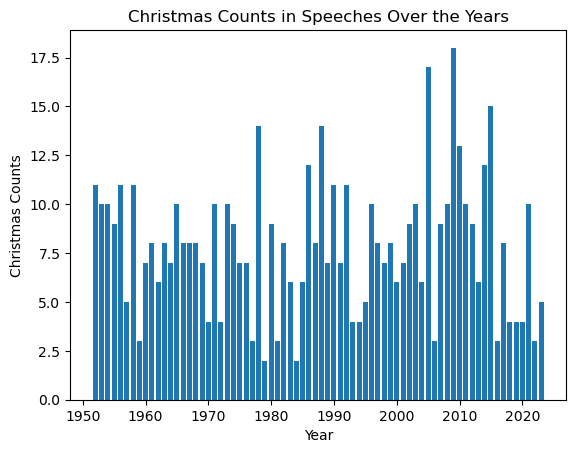

In [125]:
# Plot bar graphs for better visualization
plt.bar(df_christmas_counts['Year'], df_christmas_counts['Christmas Counts'])
plt.xlabel('Year')
plt.ylabel('Christmas Counts')
plt.title('Christmas Counts in Speeches Over the Years')
plt.show()

We will discuss the theme of family further next.
Though the word ‘family’ appears slightly less frequently in the speeches, an extraction of word frequencies reveals that not every year's Christmas speech includes this word. 

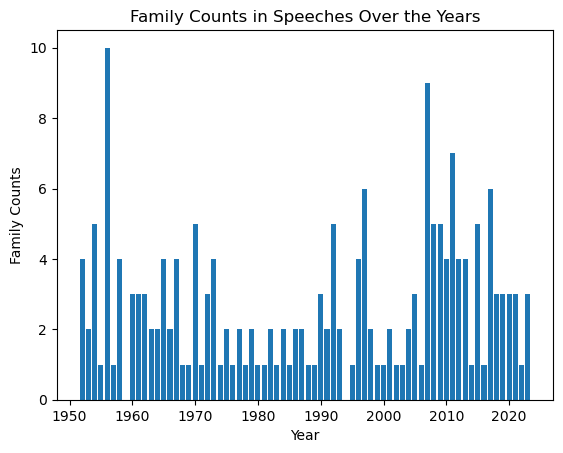

In [127]:
# Calculate the frequency of "family"
family_counts_data = {
    'Year': [],
    'Family Counts': []
}

for index, row in df_corpus.iterrows():
    year = row['year']
    content = row['WordTokensMain']  # Also base on our great "WordTokenMain"
    family_count = content.lower().count('family')
    
    family_counts_data['Year'].append(year)
    family_counts_data['Family Counts'].append(family_count)

df_family_counts = pd.DataFrame(family_counts_data)


plt.bar(df_family_counts['Year'], df_family_counts['Family Counts'])
plt.xlabel('Year')
plt.ylabel('Family Counts')
plt.title('Family Counts in Speeches Over the Years')
plt.show()

But we have expanded the word family to include not just families, but families, childern, grandchildren, and so on. This number is going to get larger.

Before we do that, we're going to check our list of words with the word "grand" in addition to the obvious ones like husband, son, daughter.

In [128]:

# Create a set to save the words we need
all_matching_words = set()

# Search words include "grand"
target_sequence = "grand"

for index, row in df_corpus.iterrows():
    content = row['WordTokensMain']  
    
    # Match words with "grand"
    matching_words = [word.strip(".,?!():;-").lower() for word in nltk.word_tokenize(content) if target_sequence in word.lower()]
    all_matching_words.update(matching_words)

# transfer set to list
all_matching_words_list = sorted(list(all_matching_words))

all_matching_words_list

["'grand",
 "'grand-daughter",
 "'grandchild",
 "'grandchildren",
 "'grandchildren.for",
 "'grandfather",
 "'grandmother",
 "'grandparent",
 "'grandparents",
 "'great-grandfather"]

This way we make sure that we don't miss words like great-grandfather and we don't miscalculate the word "grand" itself.
Next we can create a list of words related to family and count them.

In [129]:

# Create our family words list
target_words = ["family", "families", "husband", "son", "daughter", "child", "children", "grandmother", "grandfather", "grandchild", "grandchildren", "grand-daughter", "grandparents", "great-grandfather"]

word_frequencies = Counter()

for index, row in df_corpus.iterrows():
    text_tokens = row['WordTokensMain']
    word_frequencies.update(text_tokens)

for word in target_words:
    total_frequency = sum(df_corpus['WordTokensMain'].apply(lambda x: x.count(word)))
    average_frequency = total_frequency / len(df_corpus)
    print(f"{word}: {total_frequency}")
    


family: 192
families: 59
husband: 32
son: 119
daughter: 10
child: 213
children: 170
grandmother: 36
grandfather: 39
grandchild: 31
grandchildren: 24
grand-daughter: 1
grandparents: 5
great-grandfather: 3


Now we can see that the frequency of family-related words has even surpassed the frequency of Christmas. We can certainly say that "family" was also an important theme in the Queen's Christmas speech.

For the analysis of the third theme word, "commowealth", we will introduce the second research question.

### Research Question 2:
When did the term 'empire' change into 'commonwealth'? And what terms are the most associated with both?


When we talk about commonwelath, we can't avoid this: the progression from the Empire of Great Britain to the Commonwealth.
As we all know, the issuance of the Singapore Declaration in 1971 signified the shift of the Commonwealth from the colonial system of the past to a more egalitarian and cooperative international organization. The word ‘empire’ occurs very infrequently in the Queen's speeches as it encompasses a more colonial meaning. 

In [130]:
# Create the target word list
target_words = ["empire"]

word_frequencies = Counter()

for index, row in df_corpus.iterrows():
    text_tokens = row['WordTokensMain']
    word_frequencies.update(text_tokens)

# Print result
for word in target_words:
    total_frequency = sum(df_corpus['WordTokensMain'].apply(lambda x: x.count(word)))
    average_frequency = total_frequency / len(df_corpus)
    print(f"{word}: {total_frequency}")

empire: 9


By analyzing the Queen's speeches, we can see that the word ‘empire’ undergoes a gradual replacement by the concept of the Commonwealth after the 1950s.
In addition, we will also include the word "world" as a reference in the comparative analysis, in order to better observe the impact of world politics on the Queen's Speech.

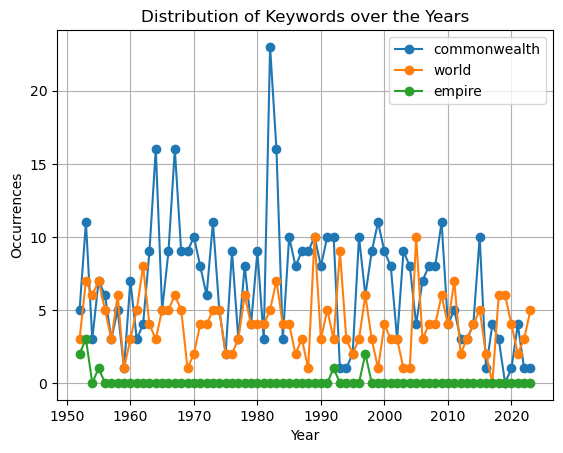

In [131]:

# Create the target words list
target_words = ["commonwealth", "world", "empire"]

df_occurrences = pd.DataFrame(index=df_corpus['year'], columns=target_words)
df_occurrences = df_occurrences.fillna(0)

for index, row in df_corpus.iterrows():
    year = row['year']
    text_tokens = row['WordTokensMain']
    for word in target_words:
        df_occurrences.at[year, word] += text_tokens.count(word.lower())

# Plotting line graphs, so we can see the trend easily
for word in target_words:
    plt.plot(df_occurrences.index, df_occurrences[word], marker='o', label=word)

plt.title('Distribution of Keywords over the Years')
plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.legend()
plt.grid(True)
plt.show()

In some special years, the Queen still mentions "empire" several times. In order to analyze this further, we will extract the relevant sentences in order to confirm the context.

In [132]:
# define a function to extract sentences that contain the corresponding word from the target column
target_column = 'SentenceTokensMain'

def extract_sentences_with_word(content, target_word):
    sentences = content.split('.')  # split sentences with "."
    occurrences = []

    for sentence in sentences:
        if target_word.lower() in sentence.lower():
            occurrences.append(sentence.strip())

    return occurrences

target_word = "empire"

df_corpus['SentencesWithKeyword'] = df_corpus[target_column].apply(lambda x: extract_sentences_with_word(x, target_word))

# Print the results, excluding NaN
for index, row in df_corpus.iterrows():
    year = row['year']
    sentences = row['SentencesWithKeyword']
    
    if sentences:
        for sentence in sentences:
            print(f"Year: {year}\nSentence: {sentence}\n")


Year: 1952
Sentence: but', 'we', 'belong', 'you', 'and', 'i', 'to', 'a', 'far', 'larger', 'family'], ['we', 'belong', 'all', 'of', 'us', 'to', 'the', 'british', 'commonwealth', 'and', 'empire', 'that', 'immense', 'union', 'of', 'nations', 'with', 'their', 'homes', 'set', 'in', 'all', 'the', 'four', 'corners', 'of', 'the', 'earth'], ['like', 'our', 'own', 'families', 'it', 'can', 'be', 'a', 'great', 'power', 'for', 'good', '-', 'a', 'force', 'which', 'i', 'believe', 'can', 'be', 'of', 'immeasurable', 'benefit', 'to', 'all', 'humanity

Year: 1952
Sentence: at', 'my', 'coronation', 'next', 'june', 'i', 'shall', 'dedicate', 'myself', 'anew', 'to', 'your', 'service'], ['i', 'shall', 'do', 'so', 'in', 'the', 'presence', 'of', 'a', 'great', 'congregation', 'drawn', 'from', 'every', 'part', 'of', 'the', 'commonwealth', 'and', 'empire', 'while', 'millions', 'outside', 'westminster', 'abbey', 'will', 'hear', 'the', 'promises', 'and', 'the', 'prayers', 'being', 'offered', 'up', 'within', 'its', '

The Queen used the word ‘empire’ six times between 1952-1955. Four of these were references to ‘commonwealth and empire’. Considering the colonial overtones embedded in the term ‘empire’, the comparison of the ‘Commonwealth’ to ‘empire’ illustrates, on the one hand, the fading of colonialism and, on the other hand, the continued existence of the concept of empire in equal measure.


Since then, the Queen had mentioned the word ‘empire’ again in 1992, in her fortieth Christmas speech. As a result of looking back over the last forty years, and the times of her father and grandfather, she inevitably used the word ‘empire’. She described the process she had experienced in moving from ‘empire’ to the ‘Commonwealth’. Clearly this is a story of old concepts being replaced by new ones.
And in 1997, she again used the word ‘empire’ twice. It contains a stronger sense of the past. Her use of the term ‘old empire’ may be related to the fact that in 1997, Hong Kong, the last British colony, was returned to China. Since then all the colonies of the old empire have ceased to exist. It was also the last time the word ‘empire’ was used in the Queen's speeches.


In order to further validate the relationship between "empire" and "commonwealth", we will identify the themes of the presentations for these five years. For this we will extract the high frequency words of the speeches of these five years.

In [133]:

# build the list of the years we would like to work on
interest_years = [1952, 1953, 1955, 1992, 1997]

# Create the dictionary to save the top words of each year
top_words_dict = {}

for index, row in df_corpus.iterrows():
    year = row['year']
    if year in interest_years:
        words = eval(row['WordTokensMain'])
        
        word_counter = Counter(words)
        
        for stopword in stoplist:
            if stopword in word_counter:
                del word_counter[stopword]

        top_words = word_counter.most_common(10)
        top_words_dict[year] = top_words

# Print results
for year, top_words in top_words_dict.items():
    print(f"\nYear: {year}")
    for word, frequency in top_words:
        print(f"{word}: {frequency}")



Year: 1952
christmas: 11
spirit: 6
shall: 6
message: 4
people: 4
today: 4
family: 4
day: 4
great: 4
old: 4

Year: 1953
christmas: 10
commonwealth: 10
new: 8
great: 8
world: 6
people: 6
nations: 6
today: 5
time: 5
hope: 5

Year: 1955
christmas: 9
year: 7
world: 6
new: 6
power: 5
commonwealth: 5
great: 4
people: 4
adventure: 4
today: 4

Year: 1992
christmas: 10
commonwealth: 8
year: 6
people: 6
family: 5
great: 5
country: 4
make: 4
help: 4
's: 4

Year: 1997
people: 7
world: 6
commonwealth: 6
christmas: 6
joy: 5
family: 5
service: 5
old: 5
today: 5
christian: 4


With the exception of the 40th anniversary speech in 1992, which was quite special, we can see that "commonwealth" has been an important theme in every year's speech. Words such as "nation" and "world" have also been mentioned throughout the years. In the 1997 speech, in view of the importance of Hong Kong as the last colony, the word "old" appeared four times, which is also worth noting.

Although in the Queen's speeches, ‘empire’ always appears in conjunction with words like ‘past’ and ‘old’, we can still see traces of the gradual replacement of the word ‘empire’ by ‘Commonwealth’ in the changes to the decades.

Aside from the turnover of these two terms, are there any other trends that have changed in speeches over the years?
To this we will ask a third question: whether the readability of the speech has changed over the entire 72 Christmas speeches.


### Research Question 3:
What does readability analysis tell us?

In the module of readability analysis, we use the Coleman Liau index.
First we start by analyzing the readability of the 72 txt files.

In [134]:
# Define a funtion to use Coleman Liau index to calculate the Readability
def calculate_coleman_liau_index(text):
    sentences = nltk.sent_tokenize(text)

    char_count = sum(len(word) for word in text if word.isalnum())
    word_count = len(nltk.word_tokenize(text))
    sentence_count = len(sentences)

    # calculate the Coleman–Liau index
    index = 0.0588 * (char_count / word_count * 100) - 0.296 * (sentence_count / word_count * 100) - 15.8

    return index

df_corpus['Coleman–Liau Index'] = df_corpus['CleanedMainText'].apply(calculate_coleman_liau_index)

print(df_corpus[['year', 'Coleman–Liau Index']])


    year  Coleman–Liau Index
0   1952            8.579504
1   1953            9.516686
2   1954            9.763320
3   1955            8.917052
4   1956            8.937512
..   ...                 ...
67  2019            8.977548
68  2020            7.720501
69  2021            7.640562
70  2022            7.437341
71  2023            6.275027

[72 rows x 2 columns]


Next we will extract the hardest and easiest speeches to read.

In [135]:

most_readable = df.nlargest(10, 'Coleman–Liau Index')
least_readable = df.nsmallest(10, 'Coleman–Liau Index')

print("Easiest: ")
print(most_readable)

print("\nHardest: ")
print(least_readable)

Easiest: 
    Year  Coleman–Liau Index
57  2009           13.124692
31  1983           12.260957
30  1982           12.101578
27  1979           11.870853
24  1976           11.844044
16  1968           11.736063
15  1967           11.693263
20  1972           11.616818
8   1960           11.597417
58  2010           11.570799

Hardest: 
    Year  Coleman–Liau Index
19  1971            8.264812
7   1959            8.505512
0   1952            8.892312
26  1978            8.914856
71  2023            9.048280
34  1986            9.107195
17  1969            9.127757
5   1957            9.224928
40  1992            9.238372
63  2015            9.317997


In addition to this, we plotted line graphs of the change in readability for each year, and included the most readable and most difficult to read scatter plots to visualize the results of our analysis.

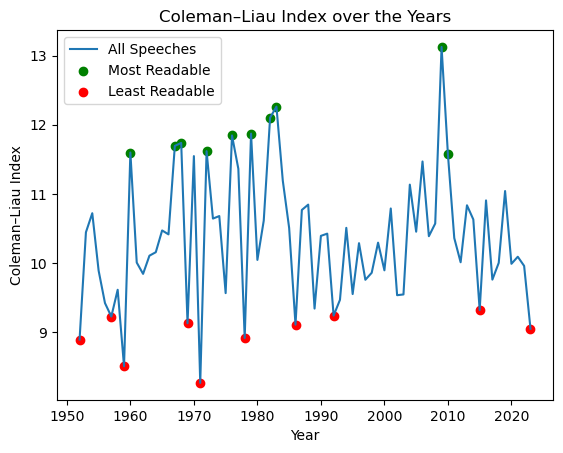

In [136]:

plt.plot(df['Year'], df['Coleman–Liau Index'], label='All Speeches')
plt.scatter(most_readable['Year'], most_readable['Coleman–Liau Index'], color='green', label='Most Readable')
plt.scatter(least_readable['Year'], least_readable['Coleman–Liau Index'], color='red', label='Least Readable')

plt.title('Coleman–Liau Index over the Years')
plt.xlabel('Year')
plt.ylabel('Coleman–Liau Index')
plt.legend()

plt.show()

Although the most readable speeches are more evenly distributed, the most difficult to read speeches are clearly concentrated mainly before 1995 and less volatile these years. And of the top ten hardest to read speeches, only two speeches are after 1995 (which also includes Charles IV's speech in 2023).
So we can see that the royal family has really made an effort in recent years to make itself more accessible to the people, this trend in readability illustrates this.